# Big Data Mart Sales Prediction

#### Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

##### Importing Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
train_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis (EDA)

In [3]:
# Checking the dimension of the dataset
train_df.shape

(8523, 12)

The training dataset contains 8523 rows and 12 columns. Out of 12 columns, 11 are features and one is target variable i.e,"Item_Outlet_Sales".

In [4]:
#Overview of the training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The columns contains three different types of data namely, object, int64 and float64 data types. The columns having object type data are categorical in nature which we need to process separately

In [5]:
# Checking null values in the training dataset
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are so many missing values in the features Item_Weight and Outlet_Size. Here Item_Weight is a numerical data so we will use mean or median method to fill these null values and Outlet_Size is a categorical data so we will use mode method to fill the null values. We will treat this missing values in the later part.

<AxesSubplot:>

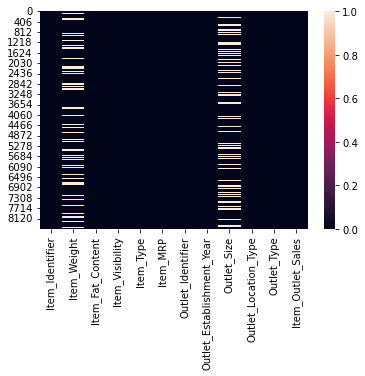

In [6]:
# Let's visualize the null values clearly
sns.heatmap(train_df.isnull())

Here we can clearly see that the presence of white lines indicates the missing values in the columns

In [7]:
# Checking the uniqueness of the label
train_df['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

In [8]:
# Checking count of outlet sales 
train_df["Item_Outlet_Sales"].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [9]:
# Statistical summary of dataset
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Using the describe method we can take a look at all the numerical data information since all the object data type gets ignored. Here the first column Item_Weight reflects on missing data when compared with the other column counts.

Also we can see a gap between the 75% and maximum value for Item_MRP indicating some outlier product with a high price.

# Data Visualization

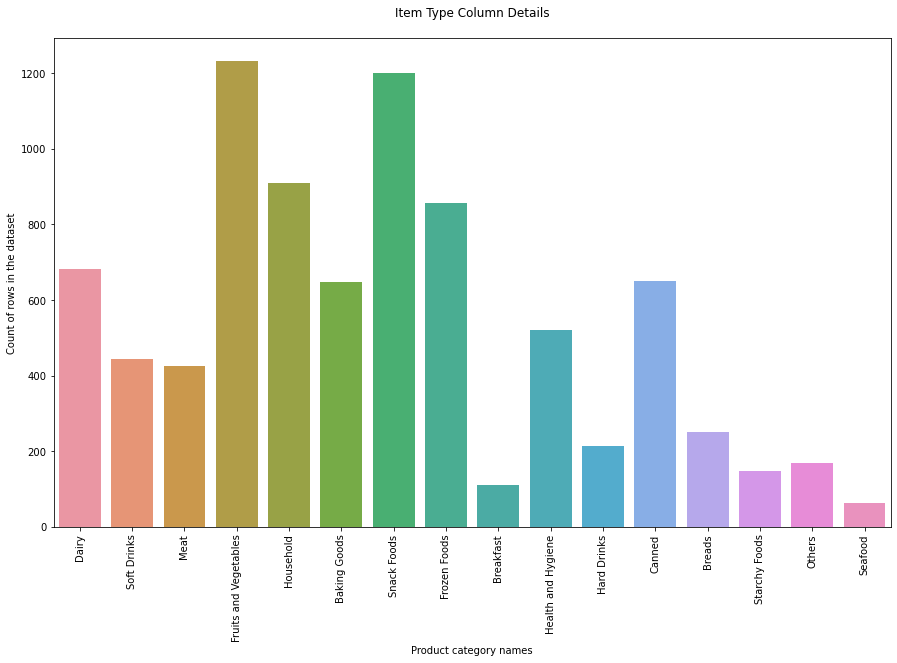

In [12]:
plt.figure(figsize=(15,9))
values = list(train_df['Item_Type'].unique())
diag = sns.countplot(train_df["Item_Type"])
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Item Type Column Details\n")
plt.xlabel("Product category names")
plt.ylabel("Count of rows in the dataset")
plt.show()

In the above count plt we see all the categorical product names present in the Item_Type column and it's value counts present in the dataset given us an insight on how Fruits/Vegetables and Snack foods are the highest number of product present in the outlet since they get sold at a larger number it needs to be stocked up accordingly.

In [14]:
# Checking value count of Item_Fat_Content
print(train_df["Item_Fat_Content"].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


This is a categorical data in which LF and Low fat classes belongs to Low Fat and reg belongs to Regular. So I am going to replace these classes with their respective categories.

In [15]:
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace('LF','Low Fat')
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace('low fat','Low Fat')
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace('reg','Regular')

Now I have replaced LF,low fat by Low Fat and reg by Regular.

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Text(0.5, 1.0, 'Item_Fat_Content')

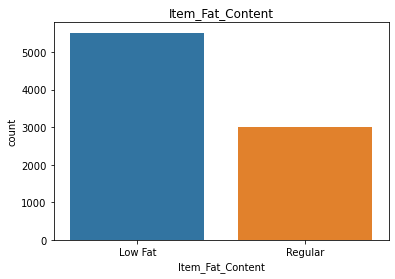

In [16]:
# Checking value count of Item_Fat_Content
print(train_df["Item_Fat_Content"].value_counts())

#Visualize the count of Item_Fat_Content
sns.countplot(train_df["Item_Fat_Content"])
plt.title("Item_Fat_Content")

From this visualization we can observe that most of the products are Low fat content and very few are regular. This means if we produce low fat items then Sales also increases.

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Text(0.5, 1.0, 'Outlet_Size')

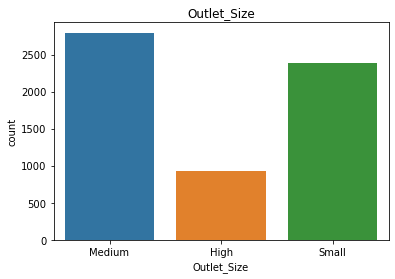

In [17]:
#Visualize the count of Outlet_Size
print(train_df["Outlet_Size"].value_counts())
sns.countplot(train_df["Outlet_Size"])
plt.title('Outlet_Size')

This is the size of the store in terms of ground area covered. Here we have 3 outlet_sizes in which the count of Medium outlet_size is more followed by Small outlet_size and High outlet_size has very less count of around 900.

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


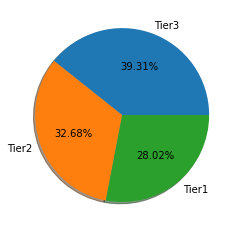

In [18]:
#Visualize the count of Outlet_Location_Type
print(train_df["Outlet_Location_Type"].value_counts())
labels='Tier3','Tier2','Tier1'
fig, ax = plt.subplots()
ax.pie(train_df['Outlet_Location_Type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

From this pie chart we can observe there are 3 types of cities namely, Tier1, Tier2 and Tier3 in which the stores are located. The city Tier3 contains more stores compare to other two and the city Tier1 has less outlets.

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


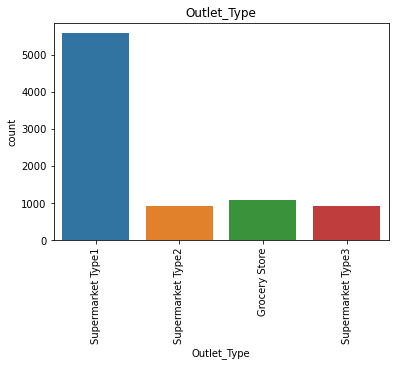

In [19]:
# Checking the value count of Outlet_Type
print(train_df["Outlet_Type"].value_counts())

#Visualize the count of Outlet_Type
sns.countplot(train_df["Outlet_Type"])
plt.title('Outlet_Type')
plt.xticks(rotation=90)
plt.show()

Here the Supermarket Type1 has high count say 5500 and is so much biased. This is because this outlet type may contain some different styles compare to others.

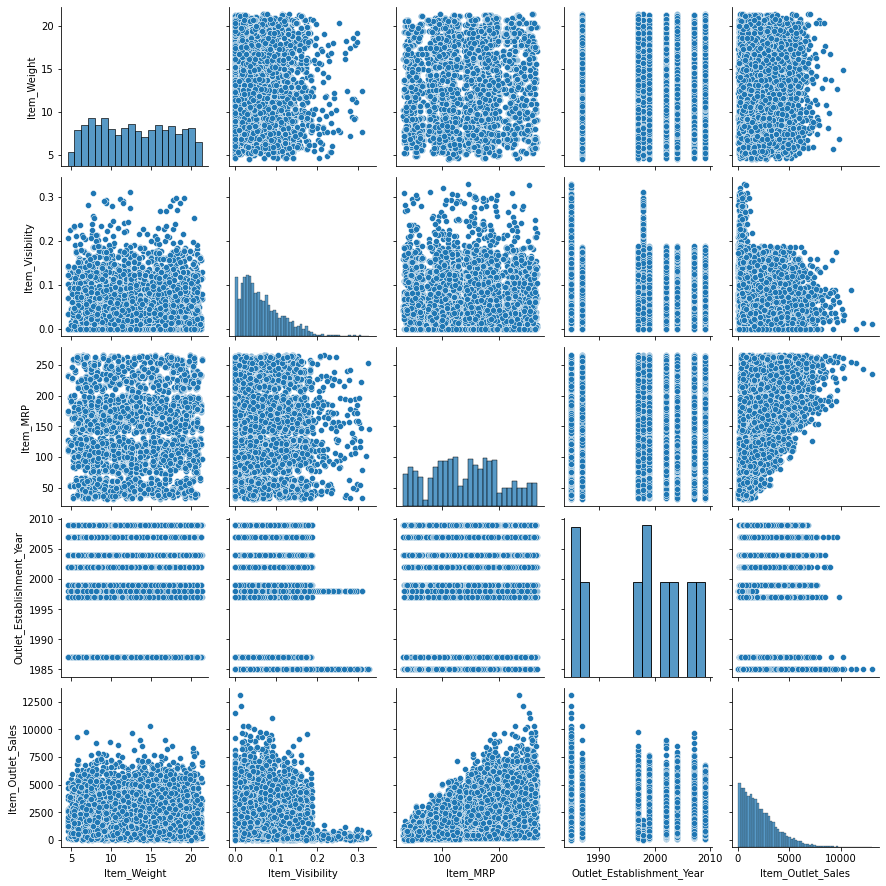

In [20]:
sns.pairplot(train_df)

The above pairplot considers only numerical data therefore all the object datatype columns have been skipped from the representation. Also the column "Outlet_Years" can be ignored since it only provides the number of year when the outlet was built. Checking through the scatterplots we see lots of data point convergence towards the centre due to the replacement of values using the mean option.

# Correlation

In [21]:
cor = train_df.corr()
cor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


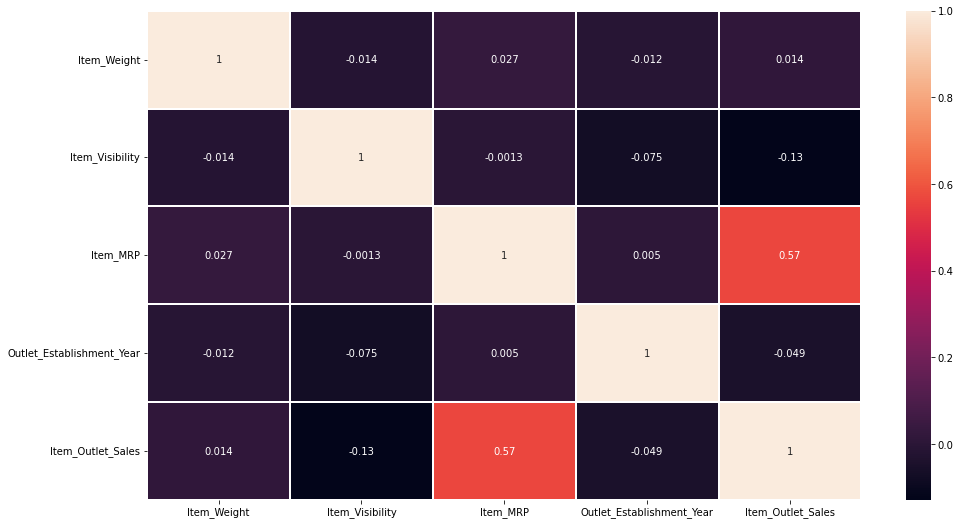

In [22]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(train_df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

This heat map contains both positive and negative correlation.

The feature Item_MRP is highly positively correlated with target variable Item_Outlet_Sales. The feature Item_Weight has very low positive correlation with target variable. The feature Item_Visibility and Outlet_Establishment_Year have very low negative correlation with the target variable. We can also observe there is very less correlation between the features.

In [23]:
cor['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

Here we can see that Item_MRP and Item_Weight have positive correlation with target variable and Outlet_Establishment_Year and Item_Visibility have negative correlation with the target.

# Data cleaning

In [24]:
# Checking the missing values
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The features Item_Weight and Outlet_Size have missing values.

Since Item_Weight has a numerical data and has no outliers then we can fill the null values by using mean method.

In [25]:
train_df['Item_Weight'].mean()  # we will rwplace the null values using this mean

12.857645184136183

In [26]:
# Filling missing values in Item_Weight
train_df["Item_Weight"] = train_df["Item_Weight"].fillna(train_df["Item_Weight"].mean())

Outlet_Size is a categorical column and the mode of Outlet_Size is Medium since it has high value count, so we can fill the NAN values using mode method.

In [27]:
# Filling missing values in Outlet_Size
train_df["Outlet_Size"] = train_df["Outlet_Size"].fillna(train_df["Outlet_Size"].mode()[0])

In [28]:
# Let's check the missing value after filling it up
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

So we have filled the missing values present in the columns. Now our data is cleaned. Let's visualize it by heat map.

<AxesSubplot:>

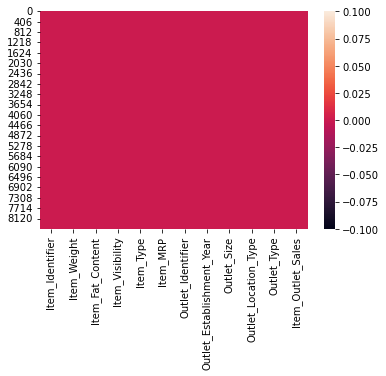

In [29]:
# Visualizing the missing value after treating it using heat map.
sns.heatmap(train_df.isnull())

# Outlier

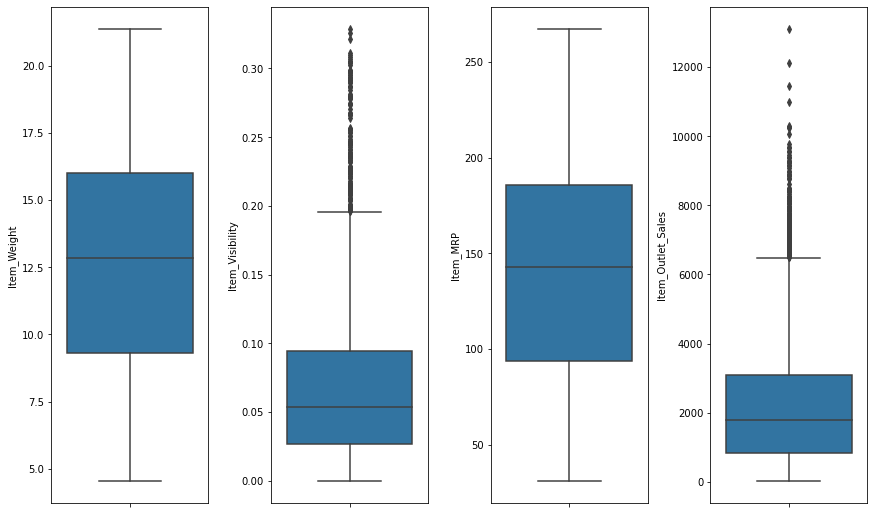

In [30]:
#Box plot to check the outliers
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
numeric_column_names = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
for col, value in train_df[numeric_column_names].items():
    sns.boxplot(y=col, data=train_df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

The columns Item_Visibility and Item_Outlet_Sales have outliers. Since Item_Outlet_Sales is our label so no need to remove outliers. Ler's remove outliers in Item_Visibility.

### Removing outliers by Zscore method

In [31]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [32]:
# Continuous feature having outliers 
variable = train_df[['Item_Visibility']]

In [33]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(variable))

z

,Item_Visibility
0,0.970732
1,0.908111
2,0.956917
3,1.281758
4,1.281758
...,...
8518,0.181193
8519,0.371154
8520,0.599784
8521,1.532880


In [34]:
# Creating new dataframe
new_df = train_df[(z<3).all(axis=1)]
new_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


This is the new dataframe after removing the outliers.

In [35]:
train_df.shape

(8523, 12)

In [36]:
new_df.shape

(8428, 12)

In [37]:
# Let's check the data loss
data_loss = (8523-8428)/8523*100
data_loss

1.1146309984747156

# Skewness

In [38]:
# Checking the skewness
new_df.skew()

Item_Weight                  0.089907
Item_Visibility              0.795956
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

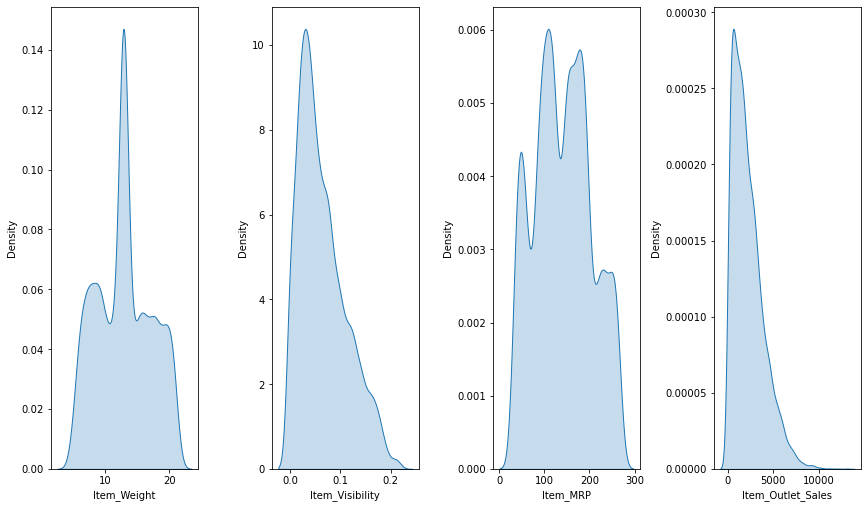

In [39]:
#Checking data distribution

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
numeric_column_names = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
for col, value in new_df[numeric_column_names].items():
    sns.distplot(value, ax=ax[index], hist=False, kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

I see that the distribution plot created for the numeric data columns show the normal distribution format for all of them. The right skewness present in "Item_Visibility" is due to the continous outlier data points. We will remove the skewness

##### Removing Skewness using yeo-johnson method

In [40]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [41]:
feature = ["Item_Visibility"]
new_df[feature] = scaler.fit_transform(new_df[feature].values)
new_df[feature].head()

,Item_Visibility
0,-1.142270
1,-1.032913
2,-1.117874
3,-1.734798
4,-1.734798


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

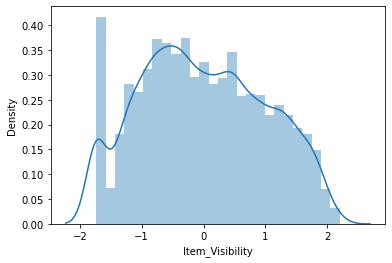

In [42]:
# After removing let's check how the data has been distributed in the column
sns.distplot(new_df["Item_Visibility"])

The data is almost normally distributed and the skewness also removed.

In [43]:
# Now let's check the skewness after removal
new_df.skew()

Item_Weight                  0.089907
Item_Visibility              0.115444
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

# Encoding

In [44]:
#checking for the categorical variables
cat_col=[]
for x in train_df.dtypes.index:
    if train_df.dtypes[x]=='object':
        cat_col.append(x)
print(cat_col)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [45]:

cols = ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

##### Encoding the data using Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[cols]= new_df[cols].apply(LE.fit_transform)

In [47]:
new_df[cols].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,4,9,1,0,1
1,8,1,14,3,1,2,2
2,662,0,10,9,1,0,1
3,1121,1,6,0,1,2,0
4,1297,0,9,1,0,2,1


Now our categorical data has been converted into the numerical data. Here we can see the unique value counts of all the encoded columns.

In [48]:
# Dataset after cleaning and encoding
new_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,-1.142270,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,-1.032913,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,-1.117874,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,-1.734798,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,-1.734798,9,53.8614,1,1987,0,2,1,994.7052


# Data Preprocessing

Separating the independent and target variables into x and y

In [49]:
x = new_df.drop("Item_Outlet_Sales", axis=1)
y = new_df["Item_Outlet_Sales"]

Here we have separated the target variable and independent variable.

In [51]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,-1.142270,4,249.8092,9,1999,1,0,1
1,8,5.92,1,-1.032913,14,48.2692,3,2009,1,2,2
2,662,17.50,0,-1.117874,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,-1.734798,6,182.0950,0,1998,1,2,0
4,1297,8.93,0,-1.734798,9,53.8614,1,1987,0,2,1


Dataset containg all independent variables.

In [52]:
y.value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1230.3984    14
             ..
3485.4630     1
4124.6310     1
5602.7070     1
1012.6818     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3475, dtype: int64

#### Scaling the data using StandardScaler

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.387548,-0.840328,-0.736710,-1.142270,-0.767129,1.747048,1.500200,0.130236,-0.277477,-1.376965,-0.271658
1,-1.716650,-1.637895,1.357386,-1.032913,1.609842,-1.488774,-0.617907,1.326952,-0.277477,1.091934,0.993279
2,-0.262377,1.094597,-0.736710,-1.117874,0.659054,0.009986,1.500200,0.130236,-0.277477,-1.376965,-0.271658
3,0.758282,1.495740,1.357386,-1.734798,-0.291735,0.659864,-1.676960,0.010564,-0.277477,1.091934,-1.536595
4,1.149646,-0.927636,-0.736710,-1.734798,0.421357,-1.398988,-1.323942,-1.305823,-1.944319,1.091934,-0.271658
...,...,...,...,...,...,...,...,...,...,...,...
8423,-0.911685,-1.414907,-0.736710,0.033409,1.372145,1.180492,-1.323942,-1.305823,-1.944319,1.091934,-0.271658
8424,0.260183,-1.057417,1.357386,-0.212619,-1.717917,-0.527246,0.794164,0.489251,-0.277477,-0.142515,-0.271658
8425,1.283066,-0.533572,-0.736710,-0.537754,0.183660,-0.897078,0.441147,0.728594,1.389364,-0.142515,-0.271658
8426,-0.220127,-1.333498,1.357386,1.538309,1.372145,-0.607906,-0.617907,1.326952,-0.277477,1.091934,0.993279


# Modeling

##### Finding the best random state

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.5381362801658555  on Random_state  115


I am getting the maximum r2 score as 53% on the random state 115.

In [58]:
# Creating new train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Regression Algorithms

In [70]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### Linear Regression

In [60]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.5381362801658555
MAE: 891.6796767853713
MSE: 1414252.9654865046
RMSE: 1189.2236818557326


The R2 score value for Linear Regression model is 53.81%

### Random Forest Regressor

In [64]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.5882557812155773
MAE: 795.9145112771847
MSE: 1260784.2041520425
RMSE: 1122.8464739901187


The R2 score value for Random Forest Regressor model is 58.82%

### AdaBoost Regressor

In [90]:
# Checking R2 score for AdaBoost Regressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)

# prediction
predABR=ABR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predABR))
print('MAE:',metrics.mean_absolute_error(y_test, predABR))
print('MSE:',metrics.mean_squared_error(y_test, predABR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predABR)))

R2_Score: 0.47363270304937166
MAE: 1017.7419733672103
MSE: 1611766.585422345
RMSE: 1269.5536953679214


The R2 score for AdaBoost regressor model is 47.36%.

### Stochastic Gradient Descent Regressor

In [66]:
# Checking R2 score for Stochastic Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

R2_Score: 0.5379429591721807
MAE: 892.7701131781467
MSE: 1414844.9253587662
RMSE: 1189.4725408174693


The R2 score for Gradient Descent Regressor model is 53.79%.

### GradientBoosting Regressor

In [88]:
# Checking R2 score for Stochastic GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

R2_Score: 0.6136344195616145
MAE: 764.7049523892617
MSE: 1183073.3708487009
RMSE: 1087.69176279344


The R2 score for GradientBoosting Regressor model is 61.41%.

### KNN Regressor

In [68]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_Score: 0.5335438702804982
MAE: 844.6352489837882
MSE: 1428315.18561808
RMSE: 1195.1214104090345


The R2 score for KNN Regressor model is 53.35%.

### Decision Tree Regressor

In [71]:
# Checking R2 score for Stochastic KNN Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_Score: 0.21151994919562644
MAE: 1080.918533649664
MSE: 2414370.73792562
RMSE: 1553.8245518479941


The R2 score for Decision Tree Regressor model is 21.15%.

### Checking the cross validation score

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

0.5045626502435461


In [74]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5).mean())

0.5455994406938395


In [89]:
# Checking cv score for AdaBoost Regression
print(cross_val_score(ABR,x,y,cv=5).mean())

0.4682324113993784


In [76]:
# Checking cv score for Stochastic Gradient Descent Regressor
print(cross_val_score(SGD,x,y,cv=5).mean())

0.5044433511374363


In [80]:
# Checking cv score for GradientBoosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.5872362377829775


In [78]:
# Checking cv score for KNN
print(cross_val_score(knn,x,y,cv=5).mean())

0.5000501269123406


In [79]:
# Checking cv score for Decision Tree
print(cross_val_score(DTR,x,y,cv=5).mean())

0.14789231599826572


From the above observation, the difference between R2 score and the cross validation score we conclude that AdaBoostRegressor is our best fitting model

## Hyper parameter tuning

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
# Adaboost Regressor
parameters = {'n_estimators':[50,200],
              'random_state':[2,3,4,5],
              'learning_rate':[0.01,0.022,0.05],
              'loss':['linear','square','exponential']}

In [94]:

GCV=GridSearchCV(AdaBoostRegressor(),parameters,cv=5)

In [95]:

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.022, 0.05],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 200],
                         'random_state': [2, 3, 4, 5]})

In [96]:
GCV.best_params_

{'learning_rate': 0.022,
 'loss': 'linear',
 'n_estimators': 200,
 'random_state': 3}

In [97]:
Final_mod = AdaBoostRegressor(learning_rate=0.022, loss='linear', n_estimators=200, random_state=3)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 1122.8464739901187
R2_Score: 58.64361942397059


After tuning R2 score of our model has been increased and has 58.64%.

# Test Data

In [98]:
# Reading the csv file from dataset
test_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


This dataset has no target variable, we need to use our past data(trained data) to get the sales prediction.

In [99]:
# Checking the dimension of the dataset
test_df.shape

(5681, 11)

In [100]:
# Checking the types of the dataset
test_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Here Item_Weight, Item_Visibility, Item_MRP are float data types, Outlet_Establishment_Year is integer type dataset and remaining all the features are object type

In [101]:
# Checking number of unique values in all the columns 
test_df.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [102]:
# Checking count of null values from the dataset.
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can notice there are missing values in the columns Item_Weight and Outlet_Size. Will treat them later.

<AxesSubplot:>

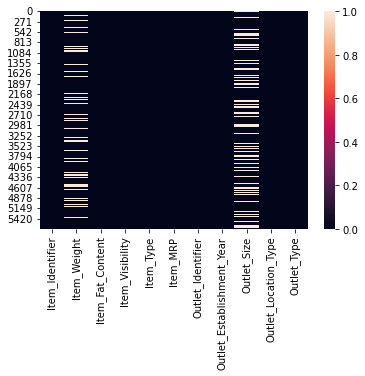

In [103]:
# Let's visualize the null values clearly
sns.heatmap(test_df.isnull())

Here we can clearly see that the presence of white lines indicates the missing values in the columns.

In [104]:
# Checking how many columns are there in the dataset
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

### Description of test Dataset

In [105]:
# Statistical summary of dataset
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [106]:
# Checking value count of Item_Fat_Content
print(test_df["Item_Fat_Content"].value_counts())

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


This is a categorical data in which LF and Low fat classes belongs to Low Fat and reg belongs to Regular. So I am going to replace these classes with their respective categories.

In [107]:
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('LF','Low Fat')
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('low fat','Low Fat')
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('reg','Regular')

Now I have replaced LF,low fat by Low Fat and reg by Regular.

In [108]:
# Checking value count of Item_Fat_Content
print(test_df["Item_Fat_Content"].value_counts())

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


### Test Data Cleaning

#### Treating Missing values using imputation techniques

In [109]:
# Checking the missing values
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

The feature Item_Weight is numerical and we will use mean methhod to fill the null values. The feature Outlet_Size is a categorical data and the mode of Outlet_Size is Medium so will use mode method to treat the null values.

In [110]:
# Filling missing values in Item_Weight
test_df["Item_Weight"] = test_df["Item_Weight"].fillna(test_df["Item_Weight"].mean())

In [111]:
# Filling missing values in Outlet_Size
test_df["Outlet_Size"] = test_df["Outlet_Size"].fillna(test_df["Outlet_Size"].mode()[0])

In [112]:
# Let's check the missing value after filling it up
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<AxesSubplot:>

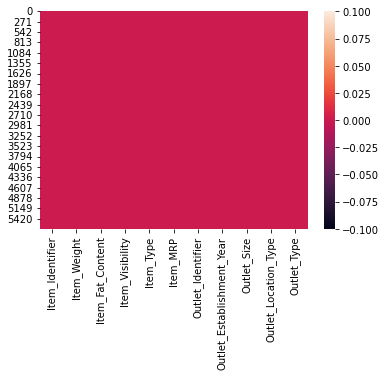

In [113]:
# Visualizing the missing value after treating it using heat map.
sns.heatmap(test_df.isnull())

### Label Encoding

In [114]:
#checking for the categorical variables
cat_cols=[]
for x in test_df.dtypes.index:
    if test_df.dtypes[x]=='object':
        cat_cols.append(x)
print(cat_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


These are the categorical columns in the test dataset.

In [115]:
from sklearn.preprocessing import LabelEncoder
columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
LE=LabelEncoder()
test_df[columns]= test_df[columns].apply(LE.fit_transform)

In [116]:
test_df[columns].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,0,13,9,1,0,1
1,1067,1,4,2,1,1,1
2,1406,0,11,0,1,2,0
3,809,0,13,2,1,1,1
4,1184,1,4,5,1,2,3


In [117]:
# Dataset after cleaning and encoding
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


### Scaling the data using StandardScaler

In [118]:
scaler = StandardScaler()
test_df = pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns)
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.739896,1.897460e+00,-0.740811,-1.134077,1.366916,-0.536555,1.507689,0.139891,-0.284737,-1.369215,-0.252769
1,0.659085,-1.035530e+00,1.349873,-0.531850,-0.766450,-0.868937,-0.959749,1.095512,-0.284737,-0.138827,-0.252769
2,1.420050,4.486336e-01,-0.740811,0.661316,0.892835,1.629848,-1.664731,0.020438,-0.284737,1.091560,-1.507994
3,0.079943,-1.267578e+00,-0.740811,-0.981416,1.366916,0.226697,-0.959749,1.095512,-0.284737,-0.138827,-0.252769
4,0.921719,-5.230960e-14,1.349873,1.032540,-0.766450,1.508110,0.097725,-1.532446,-0.284737,1.091560,2.257683


In [119]:

test_df.shape

(5681, 11)

## Prediction Result

In [124]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset

Predicted_Sales = Final_mod.predict(test_df)

Predicted_Sales

array([1676.35001835, 1495.94019966,  542.69572774, ..., 2025.138477  ,
       3602.42186667, 1450.19394843])

Here we are using Hyper Parameter Tuned Final ML Model to predict the sales of the test dataset that was provided containing only the feature columns.

The data has been saved in the variable called "Predicted_Sales" and the output is showed in truncated format.

### Converting the sales output back in CSV format

In [125]:
predicted_output = pd.DataFrame()
predicted_output['Item_Outlet_Sales']=Predicted_Sales
predicted_output

,Item_Outlet_Sales
0,1676.350018
1,1495.940200
2,542.695728
3,2531.325115
4,5361.717481
...,...
5676,2144.773875
5677,3050.686723
5678,2025.138477
5679,3602.421867


Here we are adding the predicted sales output to our original test dataset to complete it with features and target column.

In [126]:
predicted_output.to_csv("Predicted_Sales_Data.csv", index=False)

## Saving the best model

In [129]:
import joblib

filename = "FinalModel_Big_Data_Mart_Sales.pkl"
joblib.dump(Final_mod, filename)

['FinalModel_Big_Data_Mart_Sales.pkl']